In [41]:
from scipy.io import loadmat
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay




In [42]:
dataset = loadmat('dataset.mat')
data_set = loadmat('test_set.mat')

In [43]:
# Escludi le chiavi interne di MATLAB (__header__, ecc.)
chiavi_utili = [k for k in dataset.keys() if not k.startswith('__')]
chiavi_utili_t = [k for k in data_set.keys() if not k.startswith('__')]
# Supponendo che ci sia solo una variabile:
dati = dataset[chiavi_utili[0]].squeeze()
dati_t = data_set[chiavi_utili_t[0]].squeeze()
print(dati)

[[1.01761212 0.3645381  0.97395685 1.62703086 0.        ]
 [0.78798706 0.78518016 0.78798706 0.43867355 1.        ]
 [1.65485135 1.42285742 1.65485135 0.85429434 1.        ]
 ...
 [0.34867266 0.30048205 0.34867266 0.20597802 1.        ]
 [0.6785579  0.72082457 0.97244512 0.93017846 0.        ]
 [0.51636185 0.44349862 0.51636185 0.29775182 1.        ]]


In [44]:
#dividiamo i dati in training e test set in un rapport rispettivamente di 70% e 30% dei dati

# Training set
C_QS_traing = dati[0:245000,0]
C_RS_traing = dati[0:245000,1]
C_RT_traing = dati[0:245000,2]
C_QT_traing = dati[0:245000,3]
label_traing = dati[0:245000,4]

training_set = np.stack([C_QS_traing,C_RS_traing,C_RT_traing,C_QT_traing],axis=1)

#Validation set
C_QS_val = dati[245000:350000,0]
C_RS_val = dati[245000:350000,1]
C_RT_val = dati[245000:350000,2]
C_QT_val = dati[245000:350000,3]
label_val = dati[245000:350000,4]
val_set = np.stack([C_QS_val,C_RS_val,C_RT_val,C_QT_val],axis=1)

# Test set
C_QS_test = dati_t[0:dati_t.shape[0],0]
C_RS_test = dati_t[0:dati_t.shape[0],1]
C_RT_test = dati_t[0:dati_t.shape[0],2]
C_QT_test = dati_t[0:dati_t.shape[0],3]
label_test = dati_t[0:dati_t.shape[0],4]
test_set = np.stack([C_QS_test,C_RS_test,C_RT_test,C_QT_test],axis=1)


In [45]:
training_set 

array([[1.01761212, 0.3645381 , 0.97395685, 1.62703086],
       [0.78798706, 0.78518016, 0.78798706, 0.43867355],
       [1.65485135, 1.42285742, 1.65485135, 0.85429434],
       ...,
       [0.37380086, 0.32193961, 0.37380086, 0.21994747],
       [0.08574591, 0.11133193, 0.08574591, 0.02303689],
       [0.13188384, 0.14867756, 0.13188384, 0.04290416]])

In [46]:
val_set

array([[1.64591652, 1.41498   , 1.64591652, 0.85033337],
       [0.74213668, 0.63579211, 0.74213668, 0.41663417],
       [0.09262019, 0.06357676, 0.07431436, 0.09091468],
       ...,
       [0.34867266, 0.30048205, 0.34867266, 0.20597802],
       [0.6785579 , 0.72082457, 0.97244512, 0.93017846],
       [0.51636185, 0.44349862, 0.51636185, 0.29775182]])

In [47]:
test_set

array([[1.40605406e-01, 1.13778262e-01, 1.40605406e-01, 8.66073927e-02],
       [2.36305801e-01, 1.89890290e-01, 2.36305801e-01, 1.42419679e-01],
       [2.42783180e-01, 1.95019396e-01, 2.42783180e-01, 1.46136355e-01],
       ...,
       [1.53753858e+00, 1.21360586e+00, 1.53753858e+00, 8.01730645e-01],
       [3.95533488e-01, 3.32830936e-01, 3.72870422e-01, 5.32071422e-01],
       [6.15201768e-04, 7.38925760e-04, 6.15201768e-04, 2.44760949e-04]])

In [48]:
print('Dimensioni del training set:',C_QS_traing.shape)
print('Dimensioni del validation set:',C_QS_val.shape)
print('Dimensioni del test set:',C_QS_test.shape)

Dimensioni del training set: (245000,)
Dimensioni del validation set: (105000,)
Dimensioni del test set: (175000,)


In [49]:
#Creiamo la nostra rete con hidden layer
# Definizione del modello   
input_dim = 4
model = keras.models.Sequential([
 keras.layers.Dense(50, activation="relu",input_shape=(input_dim,)),
 keras.layers.Dense(1, activation="sigmoid")
 ])

c:\Users\aless\miniconda3\envs\neural_network\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)
optimizer = RMSprop(learning_rate=lr_schedule,momentum=0.9)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [52]:
history = model.fit(training_set, label_traing, epochs=100,batch_size=5000, validation_data=(val_set, label_val))

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8000 - loss: 0.4025 - val_accuracy: 0.8647 - val_loss: 0.2264
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9075 - loss: 0.2197 - val_accuracy: 0.9339 - val_loss: 0.1866
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9182 - loss: 0.1764 - val_accuracy: 0.9300 - val_loss: 0.1479
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9320 - loss: 0.1415 - val_accuracy: 0.9696 - val_loss: 0.1043
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9623 - loss: 0.1030 - val_accuracy: 0.9749 - val_loss: 0.0977
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9666 - loss: 0.0920 - val_accuracy: 0.9715 - val_loss: 0.0853
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9621 - loss: 0.0950 - val_accuracy: 0.9642 - val_loss: 0.0834
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.0796 - val_accuracy: 0.9643 - 

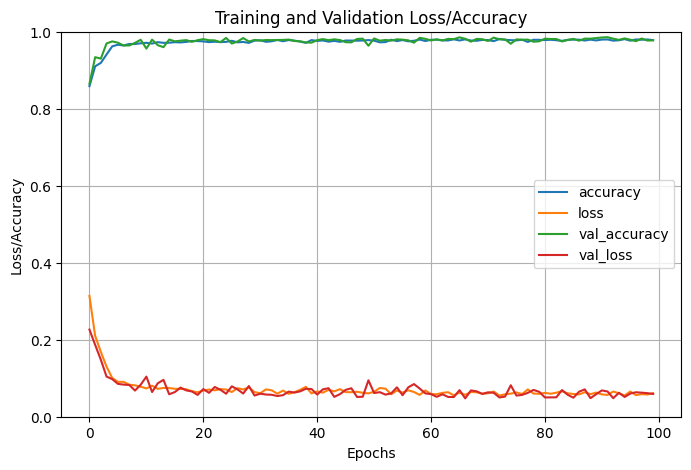

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [54]:
#Valutiamo il modello
model.evaluate(test_set,label_test)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9757 - loss: 0.0624


[0.06318694353103638, 0.9756057262420654]

In [55]:
predizioni = model.predict(test_set)

5469/5469 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [56]:
predizioni

array([[2.8521755e-27],
       [9.9958557e-01],
       [9.9979031e-01],
       ...,
       [1.0000000e+00],
       [9.9788481e-01],
       [0.0000000e+00]], dtype=float32)

In [83]:
threshold = 0.18
pred = (predizioni> threshold).astype(int)
pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

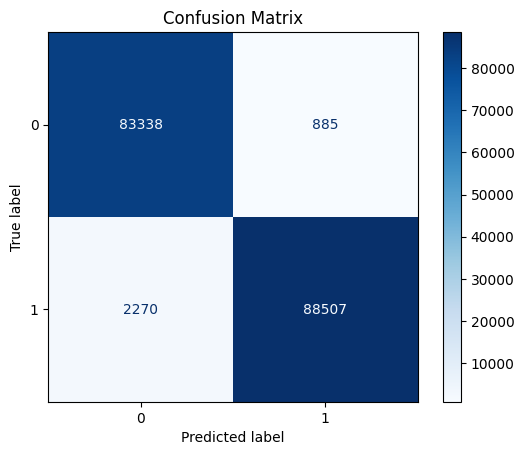

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(label_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score,accuracy_score
accuracy = accuracy_score(label_test, pred)
from sklearn.metrics import f1_score
f1 = f1_score(label_test, pred)
precision = precision_score(label_test, pred) 
recall = recall_score(label_test, pred)
print('Accuracy:', accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('f1 score:',f1)

3282/3282 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


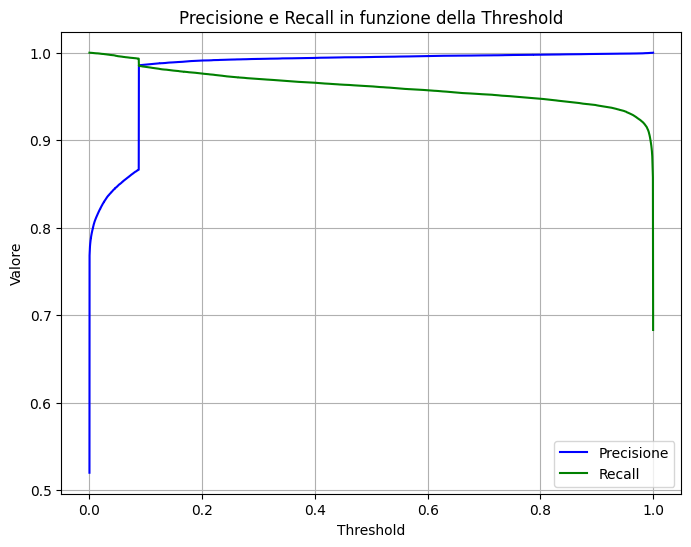

In [60]:
from sklearn.metrics import precision_recall_curve
predizioni_v = model.predict(val_set)
precision, recall, thresholds = precision_recall_curve(label_val, predizioni_v)



plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precisione', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Valore')
plt.title('Precisione e Recall in funzione della Threshold')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'ROC Curve')

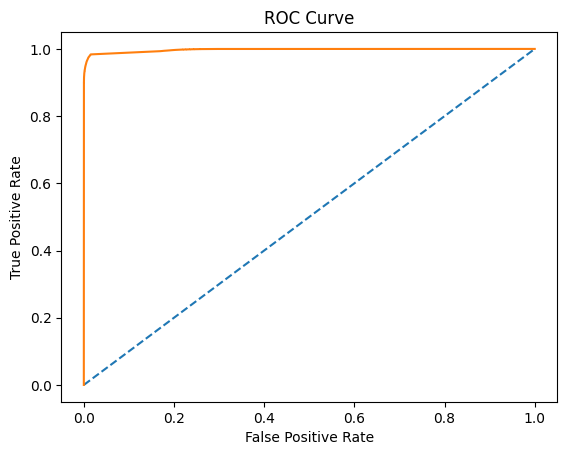

In [61]:
#QUESTA PARTE è DA RIVEDERE
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fpr,tpr,threshold = roc_curve(label_test, predizioni)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


In [62]:
roc_auc = auc(fpr, tpr)
print('AUC:',roc_auc)


AUC: 0.9973504056456186
